In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd 'gdrive/MyDrive'

/content/gdrive/MyDrive


In [3]:
!ls 'FYP Dataset'

DDoS1.csv  DoS1.csv   Idle2.csv  Idle6.csv     Working2.csv  Working6.csv
DDoS2.csv  DoS2.csv   Idle3.csv  Idle7.csv     Working3.csv  Working7.csv
DDoS3.csv  file.csv   Idle4.csv  Idle8.csv     Working4.csv  Working8.csv
DDoS4.csv  Idle1.csv  Idle5.csv  Working1.csv  Working5.csv  Working9.csv


In [4]:
import pandas as pd

In [5]:
attack=pd.read_csv('FYP Dataset/DoS1.csv')
attack = attack.sample(frac = 1)
print(len(attack))
attack=attack[:150]
working=pd.read_csv('FYP Dataset/Working1.csv')
working = working.sample(frac = 1)
print(len(working))
working=working[:3000]
idle=pd.read_csv('FYP Dataset/Idle1.csv')
idle = idle.sample(frac = 1)
print(len(idle))
idle=idle[:1850]

8575
3042
4444


In [6]:
import numpy as np
import matplotlib.pyplot as plt

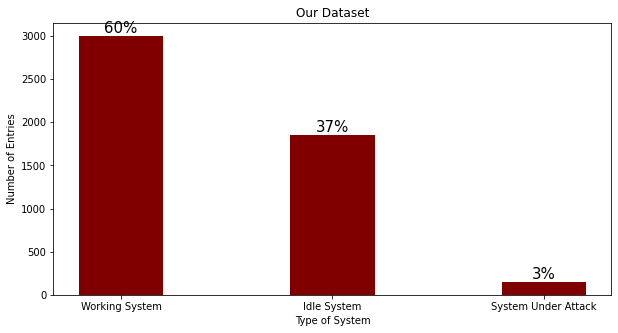

In [7]:
data={'Working System': len(working), 'Idle System': len(idle), 'System Under Attack': len(attack)}
typeOfSystem= list(data.keys())
NumberOfEntries=list(data.values())
fig = plt.figure(figsize = (10, 5))
total=len(working)+len(idle)+len(attack)
graph=plt.bar(typeOfSystem, NumberOfEntries, color ='maroon',
        width = 0.4)
for bar in graph:
    height = bar.get_height()
    percent=height*100/total
    plt.annotate( "{}%".format(int(percent)),(bar.get_x() + bar.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)
 
plt.xlabel("Type of System")
plt.ylabel("Number of Entries")
plt.title("Our Dataset")
plt.show()

In [8]:
idle["Attack"] = -1
working["Attack"] = -1
attack["Attack"] = 1

In [9]:
ls=[working,idle,attack]
dataset_train=pd.concat(ls)

In [10]:
len(dataset_train)

5000

In [11]:
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Local Host,Remote Host,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack
1342,UDP,192.168.29.184,239.255.255.250,35992.0,1900.0,NaN,NaN,ssdp,2,634 Bytes,"1,002 Bytes",0.0 KB/Sec,12/10/2022 8:59:40 AM:720,12/10/2022 11:33:42 AM:530,34:01.8,-1
1306,UDP,192.168.29.184,239.255.255.250,55086.0,1900.0,NaN,NaN,ssdp,2,643 Bytes,"1,020 Bytes",0.0 KB/Sec,12/10/2022 8:56:39 AM:992,12/10/2022 11:31:42 AM:234,35:02.2,-1
1499,TCP,192.168.29.50,35.211.149.16,55462.0,443.0,Sumedha,NaN,https,29,"6,943 Bytes","8,956 Bytes",0.0 KB/Sec,12/10/2022 9:13:58 AM:692,12/10/2022 9:16:57 AM:460,02:58.8,-1
2037,TCP,192.168.29.50,145.40.89.200,49404.0,443.0,Sumedha,prebid.a-mo.net,https,77,"30,966 Bytes","34,674 Bytes",0.0 KB/Sec,12/10/2022 9:34:55 AM:083,12/10/2022 10:50:37 AM:925,15:42.8,-1
1732,TCP,192.168.29.50,103.43.89.4,63382.0,443.0,Sumedha,NaN,https,63,"40,857 Bytes","43,935 Bytes",1.3 KB/Sec,12/10/2022 9:27:38 AM:733,12/10/2022 9:28:09 AM:046,00:30.3,-1


In [12]:
dataset_train = dataset_train.drop(["Local Host","Remote Host","Service Name","Capture Time","Last Packet Time"],axis=1)
dataset_train = dataset_train.reset_index(drop = True)
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack
0,UDP,192.168.29.184,239.255.255.250,35992.0,1900.0,2,634 Bytes,"1,002 Bytes",0.0 KB/Sec,34:01.8,-1
1,UDP,192.168.29.184,239.255.255.250,55086.0,1900.0,2,643 Bytes,"1,020 Bytes",0.0 KB/Sec,35:02.2,-1
2,TCP,192.168.29.50,35.211.149.16,55462.0,443.0,29,"6,943 Bytes","8,956 Bytes",0.0 KB/Sec,02:58.8,-1
3,TCP,192.168.29.50,145.40.89.200,49404.0,443.0,77,"30,966 Bytes","34,674 Bytes",0.0 KB/Sec,15:42.8,-1
4,TCP,192.168.29.50,103.43.89.4,63382.0,443.0,63,"40,857 Bytes","43,935 Bytes",1.3 KB/Sec,00:30.3,-1


In [13]:
dataset_train['Throughput']=0
dataset_train["Duration in seconds"] = 0

In [14]:
import string
from datetime import datetime
for i in range(len(dataset_train)):
  t = datetime.strptime(dataset_train["Duration"][i].split('.')[0], '%M:%S').time()
  dataset_train["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
  
  if(type(dataset_train["Packets"][i])==int or type(dataset_train["Packets"][i])==float):
    dataset_train["Packets"][i] = dataset_train["Packets"][i]
  else:
    if(type(dataset_train["Packets"][i])==str):
      dataset_train["Packets"][i] = dataset_train["Packets"][i].translate(str.maketrans('', '', string.punctuation))
      dataset_train["Packets"][i] = int(dataset_train["Packets"][i].split(' ')[0])
      dataset_train["Packets"][i] = int(dataset_train["Packets"][i])

<ipython-input-14-22298153ade2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
<ipython-input-14-22298153ade2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Packets"][i] = dataset_train["Packets"][i].translate(str.maketrans('', '', string.punctuation))
<ipython-input-14-22298153ade2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

In [15]:
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,UDP,192.168.29.184,239.255.255.250,35992.0,1900.0,2,634 Bytes,"1,002 Bytes",0.0 KB/Sec,34:01.8,-1,0,2041
1,UDP,192.168.29.184,239.255.255.250,55086.0,1900.0,2,643 Bytes,"1,020 Bytes",0.0 KB/Sec,35:02.2,-1,0,2102
2,TCP,192.168.29.50,35.211.149.16,55462.0,443.0,29,"6,943 Bytes","8,956 Bytes",0.0 KB/Sec,02:58.8,-1,0,178
3,TCP,192.168.29.50,145.40.89.200,49404.0,443.0,77,"30,966 Bytes","34,674 Bytes",0.0 KB/Sec,15:42.8,-1,0,942
4,TCP,192.168.29.50,103.43.89.4,63382.0,443.0,63,"40,857 Bytes","43,935 Bytes",1.3 KB/Sec,00:30.3,-1,0,30


In [16]:
for i in range(len(dataset_train)):
  val = dataset_train["Packets"][i]/dataset_train["Duration in seconds"][i]
  if val==np.inf or val==-np.inf:
    val = 10**15
  dataset_train["Throughput"][i] = val

<ipython-input-16-ad44b00ee02e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Throughput"][i] = val
<ipython-input-16-ad44b00ee02e>:2: RuntimeWarning: divide by zero encountered in long_scalars
  val = dataset_train["Packets"][i]/dataset_train["Duration in seconds"][i]


In [17]:
dataset_train=dataset_train.sort_values(by=['Throughput'])

In [18]:
throughput=dataset_train['Throughput']

In [19]:
throughput.replace([np.inf, -np.inf], np.nan, inplace=True)
throughput.dropna(how="all", inplace=True)

In [20]:
stdev = throughput.std()
mean = throughput.mean()
print(mean,stdev)

27400000000012.0 163262276457797.16


In [21]:
data=dataset_train["Throughput"].tolist()

In [22]:
c=0
for i in dataset_train['Throughput']:
  if i==1000000000000000:
    c=c+1

print(c)

137


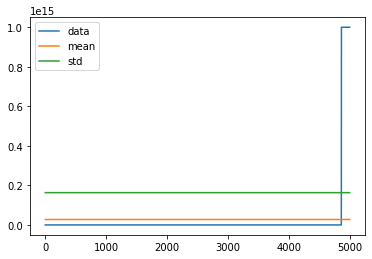

In [23]:
df = pd.DataFrame({
      'data': data,
      'mean': [mean for i in range(len(data))],
      'std': [stdev for i in range(len(data))]})
df.plot()
plt.show()

In [24]:
dataset_train["Anomaly"] = 1
dataset_train.replace(np.nan,np.inf,inplace=True)
for i in range(0,len(dataset_train["Total Size"])):
    if(abs(dataset_train["Throughput"][i]-mean)<stdev):
        dataset_train["Anomaly"][i] = -1   

<ipython-input-24-5d4597eb4d8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Anomaly"][i] = -1


In [25]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
import seaborn as sn
tn, fp, fn, tp = confusion_matrix(dataset_train["Attack"], dataset_train["Anomaly"]).ravel()
precision = precision_score(dataset_train["Attack"], dataset_train["Anomaly"])
accuracy = accuracy_score(dataset_train["Attack"], dataset_train["Anomaly"])
f1_score = f1_score(dataset_train["Attack"], dataset_train["Anomaly"])

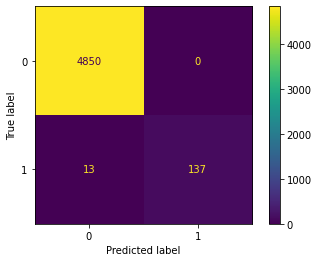

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(dataset_train["Attack"], dataset_train["Anomaly"])
disp_poly = ConfusionMatrixDisplay(cm)
disp_poly.plot()
plt.show()

In [27]:
(tn, fp, fn, tp),precision,accuracy,f1_score

((4850, 0, 13, 137), 1.0, 0.9974, 0.9547038327526133)

## Testing

In [28]:
attack=pd.read_csv('FYP Dataset/DoS1.csv')
attack=attack.append(pd.read_csv('FYP Dataset/DoS2.csv'))
attack = attack.sample(frac = 1)
print(len(attack))
attack=attack[:1000]
print(len(attack))

12138
1000


In [29]:
working=pd.read_csv('FYP Dataset/Working1.csv')
working=working.append(pd.read_csv('FYP Dataset/Working2.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working3.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working4.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working5.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working6.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working7.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working8.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working9.csv'))
working = working.sample(frac = 1)
print(len(working))
#working=working[:7000]
#print(len(working))

14897


In [30]:
idle=pd.read_csv('FYP Dataset/Idle1.csv')
idle=idle.append(pd.read_csv('FYP Dataset/Idle2.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle3.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle4.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle5.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle6.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle7.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle8.csv'))
idle = idle.sample(frac = 1)
print(len(idle))
#idle=idle[:7400]
# print(len(idle))

11032


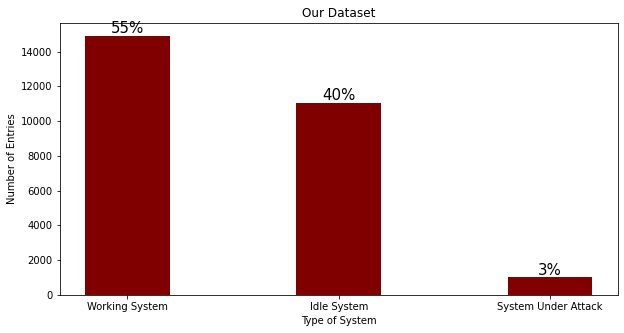

In [31]:
data={'Working System': len(working), 'Idle System': len(idle), 'System Under Attack': len(attack)}
typeOfSystem= list(data.keys())
NumberOfEntries=list(data.values())
fig = plt.figure(figsize = (10, 5))
total=len(working)+len(idle)+len(attack)
graph=plt.bar(typeOfSystem, NumberOfEntries, color ='maroon',
        width = 0.4)
for bar in graph:
    height = bar.get_height()
    percent=height*100/total
    plt.annotate( "{}%".format(int(percent)),(bar.get_x() + bar.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)
 
plt.xlabel("Type of System")
plt.ylabel("Number of Entries")
plt.title("Our Dataset")
plt.show()

In [32]:
idle["Attack"] = -1
working["Attack"] = -1
attack["Attack"] = 1

In [33]:
ls=[working,idle,attack]
dataset_test=pd.concat(ls)

In [34]:
len(dataset_test)

26929

In [35]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Local Host,Remote Host,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack
319,UDP,192.168.29.184,239.255.255.250,52250.0,1900.0,NaN,NaN,ssdp,2,686 Bytes,"1,118 Bytes",0.0 KB/Sec,12/14/2022 12:26:40 PM:889,12/14/2022 1:13:41 PM:200,47:00.3,-1
57,UDP,192.168.29.50,239.255.255.250,64073.0,1900.0,Sumedha,NaN,ssdp,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,12/15/2022 5:39:23 PM:154,12/15/2022 5:39:26 PM:183,00:03.0,-1
170,UDP,10.0.2.15,192.168.0.1,51008.0,53.0,NaN,NaN,domain,2,205 Bytes,335 Bytes,NaN,10/25/2022 9:22:00 AM:608,10/25/2022 9:22:00 AM:655,00:00.0,-1
168,UDP,192.168.29.50,239.255.255.250,53756.0,1900.0,Sumedha,NaN,ssdp,8,"1,392 Bytes","1,818 Bytes",0.4 KB/Sec,12/11/2022 9:14:30 AM:745,12/11/2022 9:14:33 AM:778,00:03.0,-1
701,TCP,192.168.29.50,35.241.26.164,51104.0,443.0,Sumedha,gce-beacons.gcp.gvt2.com,https,177,"28,519 Bytes","36,584 Bytes",0.0 KB/Sec,12/14/2022 7:31:57 PM:913,12/14/2022 7:46:40 PM:271,14:42.4,-1


In [36]:
dataset_test = dataset_test.drop(["Local Host","Remote Host","Service Name","Capture Time","Last Packet Time"],axis=1)
dataset_test = dataset_test.reset_index(drop = True)
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack
0,UDP,192.168.29.184,239.255.255.250,52250.0,1900.0,2,686 Bytes,"1,118 Bytes",0.0 KB/Sec,47:00.3,-1
1,UDP,192.168.29.50,239.255.255.250,64073.0,1900.0,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,00:03.0,-1
2,UDP,10.0.2.15,192.168.0.1,51008.0,53.0,2,205 Bytes,335 Bytes,NaN,00:00.0,-1
3,UDP,192.168.29.50,239.255.255.250,53756.0,1900.0,8,"1,392 Bytes","1,818 Bytes",0.4 KB/Sec,00:03.0,-1
4,TCP,192.168.29.50,35.241.26.164,51104.0,443.0,177,"28,519 Bytes","36,584 Bytes",0.0 KB/Sec,14:42.4,-1


In [37]:
dataset_test['Throughput']=0

In [38]:
dataset_test["Duration in seconds"] = 0

In [39]:
import string
from datetime import datetime
for i in range(len(dataset_test)):
  t = datetime.strptime(dataset_test["Duration"][i].split('.')[0], '%M:%S').time()
  dataset_test["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
  
  if(type(dataset_test["Packets"][i])==int or type(dataset_test["Packets"][i])==float):
    dataset_test["Packets"][i] = dataset_test["Packets"][i]
  else:
    if(type(dataset_test["Packets"][i])==str):
      dataset_test["Packets"][i] = dataset_test["Packets"][i].translate(str.maketrans('', '', string.punctuation))
      dataset_test["Packets"][i] = int(dataset_test["Packets"][i].split(' ')[0])
      dataset_test["Packets"][i] = int(dataset_test["Packets"][i])

<ipython-input-39-ee91ebca76a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
<ipython-input-39-ee91ebca76a1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Packets"][i] = dataset_test["Packets"][i].translate(str.maketrans('', '', string.punctuation))
<ipython-input-39-ee91ebca76a1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset

In [40]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,UDP,192.168.29.184,239.255.255.250,52250.0,1900.0,2,686 Bytes,"1,118 Bytes",0.0 KB/Sec,47:00.3,-1,0,2820
1,UDP,192.168.29.50,239.255.255.250,64073.0,1900.0,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,00:03.0,-1,0,3
2,UDP,10.0.2.15,192.168.0.1,51008.0,53.0,2,205 Bytes,335 Bytes,NaN,00:00.0,-1,0,0
3,UDP,192.168.29.50,239.255.255.250,53756.0,1900.0,8,"1,392 Bytes","1,818 Bytes",0.4 KB/Sec,00:03.0,-1,0,3
4,TCP,192.168.29.50,35.241.26.164,51104.0,443.0,177,"28,519 Bytes","36,584 Bytes",0.0 KB/Sec,14:42.4,-1,0,882


In [41]:
for i in range(len(dataset_test)):
  val = dataset_test["Packets"][i]/dataset_test["Duration in seconds"][i]
  if val==np.inf or val==-np.inf:
    val = 10**15
  dataset_test["Throughput"][i] = val

<ipython-input-41-f3b1ecf7bb72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Throughput"][i] = val
<ipython-input-41-f3b1ecf7bb72>:2: RuntimeWarning: divide by zero encountered in long_scalars
  val = dataset_test["Packets"][i]/dataset_test["Duration in seconds"][i]


In [42]:
dataset_test

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,UDP,192.168.29.184,239.255.255.250,52250.0,1900.0,2,686 Bytes,"1,118 Bytes",0.0 KB/Sec,47:00.3,-1,0,2820
1,UDP,192.168.29.50,239.255.255.250,64073.0,1900.0,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,00:03.0,-1,2,3
2,UDP,10.0.2.15,192.168.0.1,51008.0,53.0,2,205 Bytes,335 Bytes,NaN,00:00.0,-1,1000000000000000,0
3,UDP,192.168.29.50,239.255.255.250,53756.0,1900.0,8,"1,392 Bytes","1,818 Bytes",0.4 KB/Sec,00:03.0,-1,2,3
4,TCP,192.168.29.50,35.241.26.164,51104.0,443.0,177,"28,519 Bytes","36,584 Bytes",0.0 KB/Sec,14:42.4,-1,0,882
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26924,UDP,10.15.13.179,10.0.2.4,54793.0,54427.0,1,"1,472 Bytes","3,000 Bytes",NaN,00:00.0,1,1000000000000000,0
26925,UDP,10.15.13.179,10.0.2.4,54793.0,2792.0,2,"2,944 Bytes","4,500 Bytes",NaN,00:00.0,1,1000000000000000,0
26926,UDP,10.15.13.179,10.0.2.4,54793.0,30293.0,2,"2,944 Bytes","4,500 Bytes",0.0 KB/Sec,01:38.8,1,0,98
26927,UDP,10.15.13.179,10.0.2.4,54793.0,1534.0,2,"2,944 Bytes","4,500 Bytes",NaN,00:00.0,1,1000000000000000,0


In [43]:
dataset_test=dataset_test.sort_values(by=['Throughput'])

In [44]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,UDP,192.168.29.184,239.255.255.250,52250.0,1900.0,2,686 Bytes,"1,118 Bytes",0.0 KB/Sec,47:00.3,-1,0,2820
21990,UDP,192.168.29.184,239.255.255.250,47979.0,1900.0,3,974 Bytes,"1,370 Bytes",0.0 KB/Sec,13:01.4,-1,0,781
21989,UDP,192.168.29.184,239.255.255.250,59115.0,1900.0,2,631 Bytes,"1,008 Bytes",0.0 KB/Sec,35:47.4,-1,0,2147
13290,UDP,192.168.29.184,239.255.255.250,40989.0,1900.0,2,568 Bytes,936 Bytes,0.0 KB/Sec,58:59.4,-1,0,3539
13291,TCP,192.168.29.50,52.0.2.180,63039.0,443.0,142,"152,692 Bytes","158,596 Bytes",1.0 KB/Sec,02:35.9,-1,0,155


In [45]:
throughput=dataset_test['Throughput']

In [46]:
throughput.replace([np.inf, -np.inf], np.nan, inplace=True)
throughput.dropna(how="all", inplace=True)

In [47]:
data=dataset_test["Throughput"].tolist()

In [48]:
c=0
for i in dataset_test['Throughput']:
  if i==1000000000000000:
    c=c+1

print(c)

1339


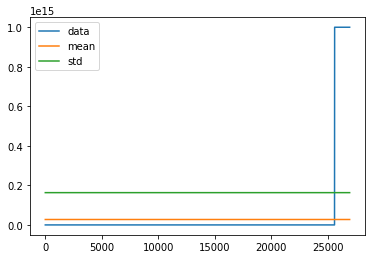

In [49]:
df = pd.DataFrame({
      'data': data,
      'mean': [mean for i in range(len(data))],
      'std': [stdev for i in range(len(data))]})
df.plot()
plt.show()

In [50]:
dataset_test["Anomaly"] = 1
dataset_test.replace(np.nan,np.inf,inplace=True)
for i in range(0,len(dataset_test["Total Size"])):
    if(abs(dataset_test["Throughput"][i]-mean)<stdev):
        dataset_test["Anomaly"][i] = -1   

<ipython-input-50-4caa7296dcdc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Anomaly"][i] = -1


In [51]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
import seaborn as sn
tn, fp, fn, tp = confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly"]).ravel()
precision = precision_score(dataset_test["Attack"], dataset_test["Anomaly"])
accuracy = accuracy_score(dataset_test["Attack"], dataset_test["Anomaly"])
f1_score = f1_score(dataset_test["Attack"], dataset_test["Anomaly"])

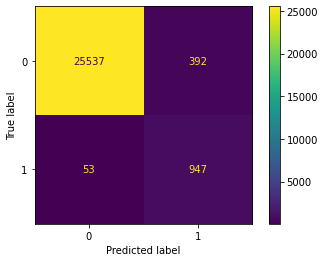

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly"])
disp_poly = ConfusionMatrixDisplay(cm)
disp_poly.plot()
plt.show()

In [53]:
(tn, fp, fn, tp),precision,accuracy,f1_score

((25537, 392, 53, 947),
 0.707244212098581,
 0.983475064057336,
 0.8097477554510474)

## Entropy Based

In [54]:
import scipy.stats
def entropy_calc(data):
    p_data = data.value_counts()           
    entropy = scipy.stats.entropy(p_data)  
    return entropy

In [55]:
dataset_test["Entropy Remote Port"] = 0.0
for i in range(0,len(dataset_test)):
  dataset_test["Entropy Remote Port"][i] = entropy_calc(dataset_test["Remote Port"][:i+1])

<ipython-input-55-99b041f0ca6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Entropy Remote Port"][i] = entropy_calc(dataset_test["Remote Port"][:i+1])


In [56]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds,Anomaly,Entropy Remote Port
0,UDP,192.168.29.184,239.255.255.250,52250.0,1900.0,2,686 Bytes,"1,118 Bytes",0.0 KB/Sec,47:00.3,-1,0,2820,-1,0.000000
21990,UDP,192.168.29.184,239.255.255.250,47979.0,1900.0,3,974 Bytes,"1,370 Bytes",0.0 KB/Sec,13:01.4,-1,0,781,-1,1.163531
21989,UDP,192.168.29.184,239.255.255.250,59115.0,1900.0,2,631 Bytes,"1,008 Bytes",0.0 KB/Sec,35:47.4,-1,0,2147,-1,1.163542
13290,UDP,192.168.29.184,239.255.255.250,40989.0,1900.0,2,568 Bytes,936 Bytes,0.0 KB/Sec,58:59.4,-1,0,3539,-1,1.186272
13291,TCP,192.168.29.50,52.0.2.180,63039.0,443.0,142,"152,692 Bytes","158,596 Bytes",1.0 KB/Sec,02:35.9,-1,0,155,-1,1.186393


In [57]:
dataset_test["Anomaly Remote Port Entropy Based"] = -1
check_port = dataset_test["Entropy Remote Port"][0]
for i in range(0,len(dataset_test)):
    if (dataset_test["Entropy Remote Port"][i]>=check_port) and (dataset_test['Throughput'][i] >mean):
        dataset_test["Anomaly Remote Port Entropy Based"][i] = 1
    check_port=dataset_test["Entropy Remote Port"][i]

<ipython-input-57-d8192ffc375e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Anomaly Remote Port Entropy Based"][i] = 1


In [58]:
dataset_test.to_csv('FYP Dataset/file.csv', header=True, index=False)

In [59]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
tn, fp, fn, tp = confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"]).ravel()
precision = precision_score(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"])
accuracy = accuracy_score(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"])
f1_score = f1_score(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"])
(tn,fp,fn,tp), precision, accuracy, f1_score

((25868, 61, 140, 860),
 0.9337676438653637,
 0.9925359278101675,
 0.8953669963560645)

In [60]:
dataset_test["Entropy Throughput"] = 0.0
for i in range(0,len(dataset_test)):
  dataset_test["Entropy Throughput"][i] = entropy_calc(dataset_test["Throughput"][:i+1])

<ipython-input-60-8752eabf6d76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Entropy Throughput"][i] = entropy_calc(dataset_test["Throughput"][:i+1])


In [65]:
dataset_test["Anomaly Throughput Entropy Based"] = -1
check_throughput = dataset_test["Entropy Throughput"][0]
for i in range(0,len(dataset_test)):
    if (dataset_test["Entropy Throughput"][i]>=check_throughput) and (dataset_test['Throughput'][i] >mean):
        dataset_test["Anomaly Throughput Entropy Based"][i] = 1
    check_throughput=dataset_test["Entropy Throughput"][i]

<ipython-input-65-945067488720>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Anomaly Throughput Entropy Based"][i] = 1


In [66]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
tn, fp, fn, tp = confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly Throughput Entropy Based"]).ravel()
precision = precision_score(dataset_test["Attack"], dataset_test["Anomaly Throughput Entropy Based"])
accuracy = accuracy_score(dataset_test["Attack"], dataset_test["Anomaly Throughput Entropy Based"])
f1_score = f1_score(dataset_test["Attack"], dataset_test["Anomaly Throughput Entropy Based"])
(tn,fp,fn,tp), precision, accuracy, f1_score

((25537, 392, 53, 947),
 0.707244212098581,
 0.983475064057336,
 0.8097477554510474)